In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1 data loading and checking whether data has been loaded properly or not and also displaying the few lines of the data

file_path = '/content/heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(file_path)
df.head()
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [36]:
df.describe()
print(df.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

In [6]:
# 2 data preprocessing
#2.1 Checking whether the data has missing values in the code or not.

missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


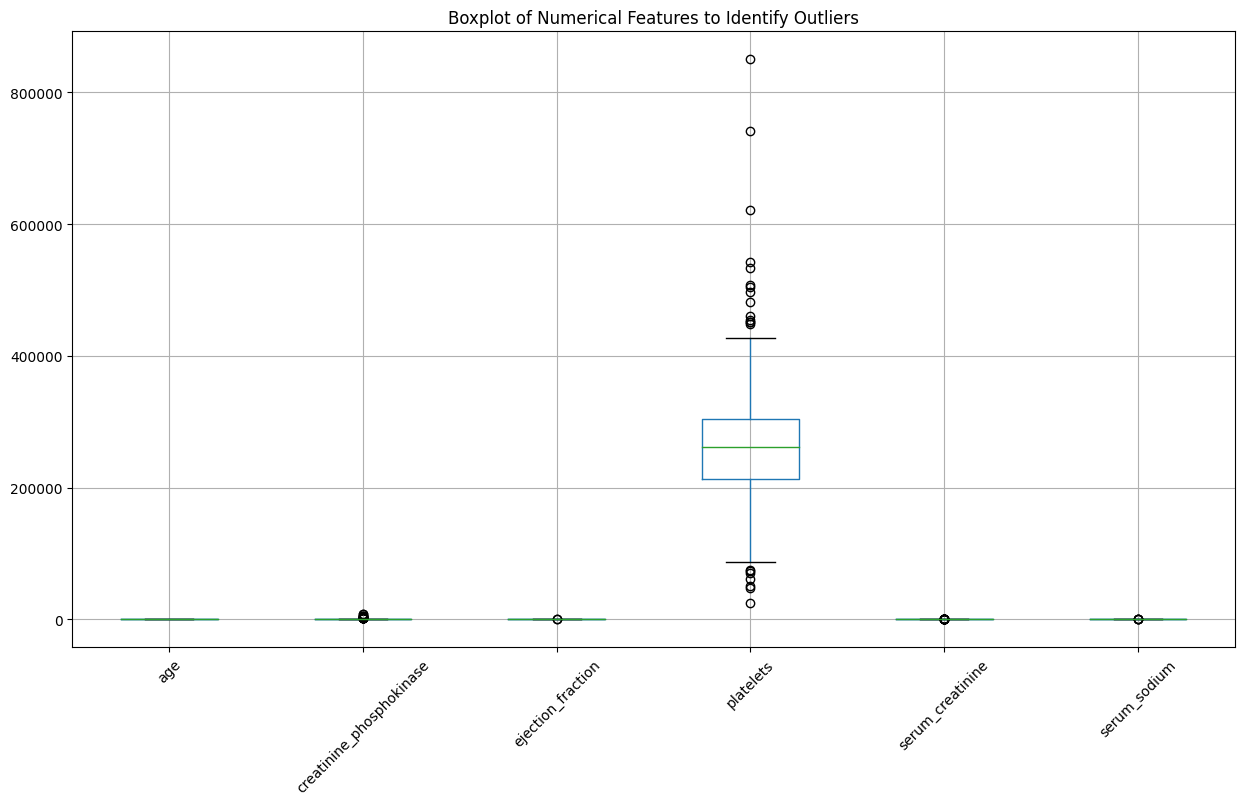

In [7]:
#2.2 As the data has no outliers we need to check whether the data in the data set has any outliers or not by using only numerical columns
plt.figure(figsize=(15, 8))
df.boxplot(column=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'])
plt.title("Boxplot of Numerical Features to Identify Outliers")
plt.xticks(rotation=45)
plt.show()

In [8]:
#2.3 Handeling the outliers using the inter quartile range to remove the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Removing the outliers present in the numerical column
data_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nData shape after removing outliers:", data_no_outliers.shape)


Data shape after removing outliers: (224, 13)


In [9]:
#2.4 Scaling the data such that we can predict the output more accurately
scaler = StandardScaler()
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
data_no_outliers.loc[:, numerical_features] = scaler.fit_transform(data_no_outliers[numerical_features])
print("\nFirst few rows of the normalized dataset:")
print(data_no_outliers.head())


First few rows of the normalized dataset:
        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  1.190537        0                  0.878670         0          -1.555768   
2  0.351568        0                 -0.684634         0          -1.555768   
3 -0.906886        1                 -0.810128         0          -1.555768   
5  2.448991        1                 -1.039604         0           0.155882   
6  1.190537        1                 -0.326078         0          -1.983680   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1   0.136333          2.358663     -1.854716    1   
2                    0  -1.400896          0.524147     -2.117996    1   
3                    0  -0.684517          2.358663     -0.011754    1   
5                    1  -0.774065          2.970169     -1.328155    1   
6                    0  -1.923255          0.218395     -0.011754    1   

   smoking  time  DEATH_EVENT  
0    

In [10]:
#2.5 feature encoding to know whether any data needs to be encoded from categorical to numerical
print("\nUnique values for categorical columns:")
print("Sex:", data_no_outliers['sex'].unique())
print("Anaemia:", data_no_outliers['anaemia'].unique())
print("Diabetes:", data_no_outliers['diabetes'].unique())
print("High Blood Pressure:", data_no_outliers['high_blood_pressure'].unique())
print("Smoking:", data_no_outliers['smoking'].unique())


Unique values for categorical columns:
Sex: [1 0]
Anaemia: [0 1]
Diabetes: [0 1]
High Blood Pressure: [1 0]
Smoking: [0 1]


In [11]:
#3 As the data has been cleaned now we need to split the data into train and test
X = data_no_outliers.drop('DEATH_EVENT', axis=1)
y = data_no_outliers['DEATH_EVENT']

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShapes of Train and Test Sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of Train and Test Sets:
X_train: (179, 12)
X_test: (45, 12)
y_train: (179,)
y_test: (45,)


In [12]:
# 3.1 Balance the Dataset with SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\nAfter SMOTE - Shapes of Resampled Train Sets:")
print("X_train_res:", X_train_res.shape)
print("y_train_res:", y_train_res.shape)
print("Resampled class distribution:\n", pd.Series(y_train_res).value_counts())


After SMOTE - Shapes of Resampled Train Sets:
X_train_res: (258, 12)
y_train_res: (258,)
Resampled class distribution:
 DEATH_EVENT
0    129
1    129
Name: count, dtype: int64



Logistic Regression Results:
Accuracy: 0.8
Confusion Matrix:
 [[32  2]
 [ 7  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88        34
           1       0.67      0.36      0.47        11

    accuracy                           0.80        45
   macro avg       0.74      0.65      0.67        45
weighted avg       0.78      0.80      0.78        45

ROC AUC Score: 0.6524064171122995


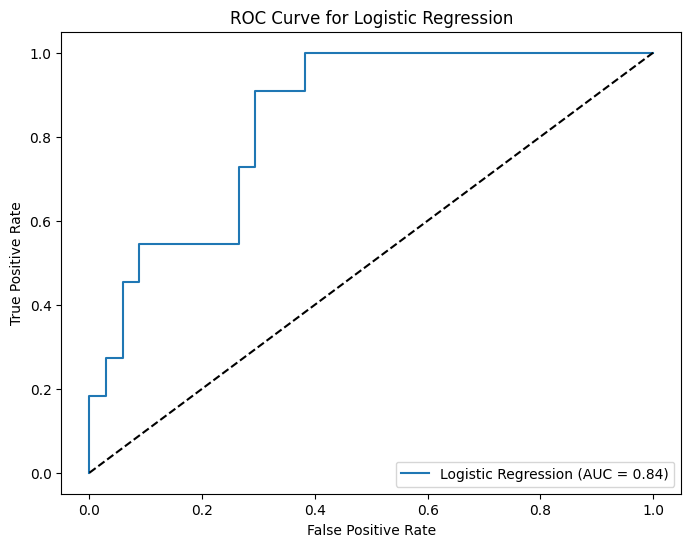


Feature Importance for Logistic Regression:
                     Feature  Importance
7           serum_creatinine    0.551178
10                   smoking    0.431541
0                        age    0.418683
1                    anaemia    0.400044
2   creatinine_phosphokinase    0.172603
6                  platelets    0.064764
3                   diabetes    0.058917
11                      time   -0.021952
5        high_blood_pressure   -0.249180
8               serum_sodium   -0.264939
9                        sex   -0.711159
4          ejection_fraction   -0.961166


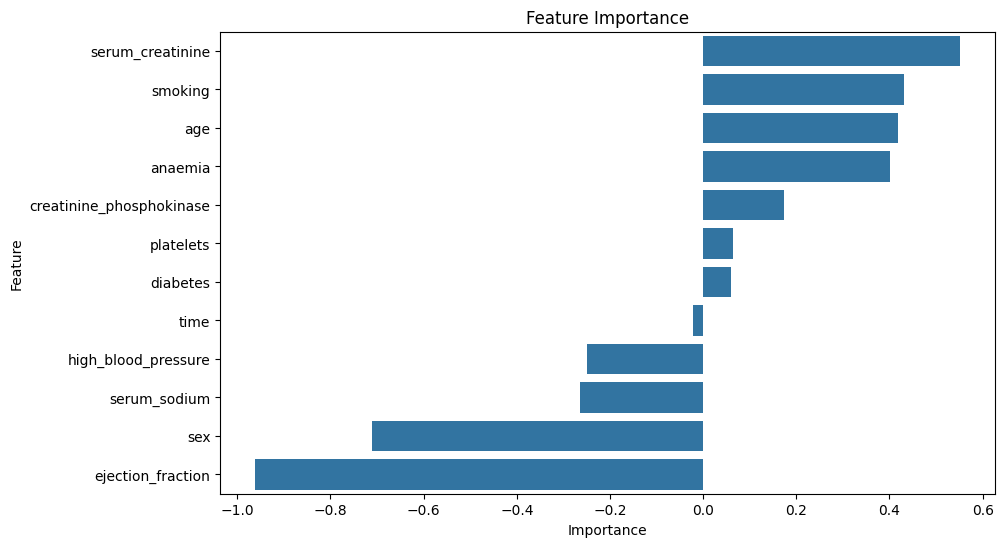

In [34]:
#4 As the data has been splitted into training and testing now we need to train the logistic regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Evaluating the model using accuracy score, confusion matrix, roc_auc and classification report
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_confusion_matrix = confusion_matrix(y_test, logistic_predictions)
logistic_classification_report = classification_report(y_test, logistic_predictions)
logistic_roc_auc = roc_auc_score(y_test, logistic_predictions)

print("\nLogistic Regression Results:")
print("Accuracy:", logistic_accuracy)
print("Confusion Matrix:\n", logistic_confusion_matrix)
print("Classification Report:\n", logistic_classification_report)
print("ROC AUC Score:", logistic_roc_auc)

# Plotting the graph of ROC curve for the better ubderstanding of the model
fpr, tpr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Feature importance is done to notice which feature has direct impact on the cause of heart disease and which will be the least impcated
feature_importance_logistic = pd.DataFrame({
    'Feature': X.columns,
    'Importance': logistic_model.coef_[0]
})
print("\nFeature Importance for Logistic Regression:")
print(feature_importance_logistic.sort_values(by='Importance', ascending=False))
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_logistic.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance')
plt.show()



Support Vector Machine Results:
Accuracy: 0.8
Confusion Matrix:
 [[32  2]
 [ 7  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88        34
           1       0.67      0.36      0.47        11

    accuracy                           0.80        45
   macro avg       0.74      0.65      0.67        45
weighted avg       0.78      0.80      0.78        45



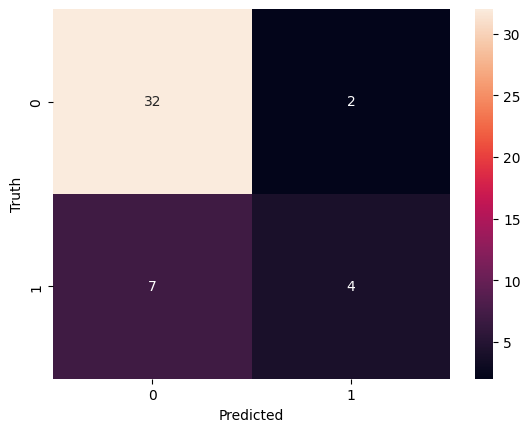

In [33]:
# Now lets train another method which is support vector machine to know the better model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Evaluating the model using accuracy score
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)

print("\nSupport Vector Machine Results:")
print("Accuracy:", svm_accuracy)
print("Confusion Matrix:\n", svm_confusion_matrix)
print("Classification Report:\n", svm_classification_report)

cm=confusion_matrix(y_test,svm_predictions)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()



Decision Tree Results:
Accuracy: 0.7111111111111111
Confusion Matrix:
 [[27  7]
 [ 6  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81        34
           1       0.42      0.45      0.43        11

    accuracy                           0.71        45
   macro avg       0.62      0.62      0.62        45
weighted avg       0.72      0.71      0.72        45

ROC AUC Score: 0.6243315508021391


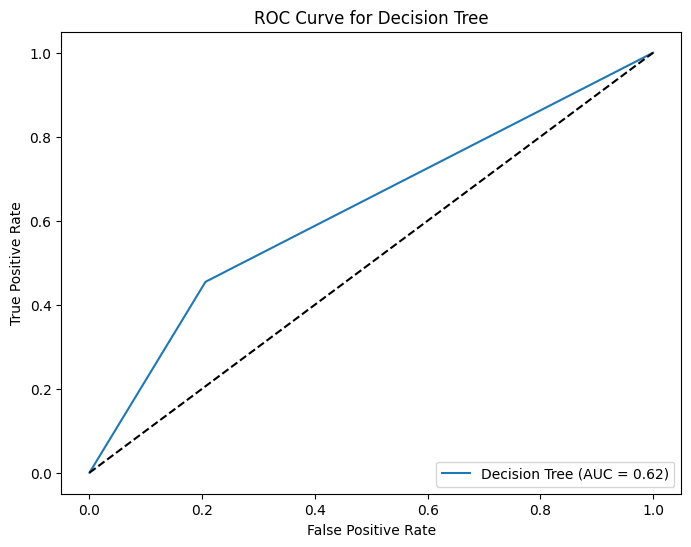

In [31]:
# Train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
decision_tree_predictions = decision_tree_model.predict(X_test)

# Evaluate the model
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_confusion_matrix = confusion_matrix(y_test, decision_tree_predictions)
decision_tree_classification_report = classification_report(y_test, decision_tree_predictions)
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree_predictions)

print("\nDecision Tree Results:")
print("Accuracy:", decision_tree_accuracy)
print("Confusion Matrix:\n", decision_tree_confusion_matrix)
print("Classification Report:\n", decision_tree_classification_report)
print("ROC AUC Score:", decision_tree_roc_auc)

fpr, tpr, _ = roc_curve(y_test, decision_tree_model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()


In [18]:
# Comparing all three models to know which model performed better in predicting the output of the DEATH_EVENT
results = {
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Decision Tree'],
    'Accuracy': [logistic_accuracy, svm_accuracy, decision_tree_accuracy],
}

# Convert the summary into a DataFrame
results_df = pd.DataFrame(results)

# Display the comparison
print("\nComparison of Model Results:")
print(results_df)


Comparison of Model Results:
                    Model  Accuracy
0     Logistic Regression  0.800000
1  Support Vector Machine  0.800000
2           Decision Tree  0.711111


In [69]:
# Now we will see how the models has predicted the outputs on predicting the heart diseases
log_train = logistic_model.score(X_train, y_train)
svc_train = svm_model.score(X_train, y_train)
decision_train = decision_tree_model.score(X_train, y_train)

models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression',
        'Decision Tree'
    ],

    'Training Accuracy':
    [svc_train, log_train, decision_train],

    'Model Accuracy Score': [
        svm_accuracy, logistic_accuracy, decision_tree_accuracy,
    ]
})

print("\nModels Comparison Sorted by Accuracy:")
print(models.sort_values(by='Model Accuracy Score', ascending=False))

# Cross Checking Actual vs Predicted for Decision Tree
prediction1 = logistic_model.predict(X_test)
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
print("\nCross Checking Actual vs Predicted for logistic regression:")
print(cross_checking.sample(5))

prediction2 = svm_model.predict(X_test)
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
print("\nCross Checking Actual vs Predicted for Support Vector Machine:")
print(cross_checking.sample(5))

prediction3 = decision_tree_model.predict(X_test)
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
print("\nCross Checking Actual vs Predicted for Decision Tree:")
print(cross_checking.sample(5))



Models Comparison Sorted by Accuracy:
                     Model  Training Accuracy  Model Accuracy Score
0  Support Vector Machines           0.888268              0.800000
1      Logistic Regression           0.871508              0.800000
2            Decision Tree           1.000000              0.711111

Cross Checking Actual vs Predicted for logistic regression:
     Actual  Predicted
93        1          1
34        1          0
245       0          0
249       0          0
135       0          0

Cross Checking Actual vs Predicted for Support Vector Machine:
     Actual  Predicted
101       0          0
232       0          0
192       0          0
293       0          0
264       0          0

Cross Checking Actual vs Predicted for Decision Tree:
     Actual  Predicted
94        0          0
140       1          0
198       0          0
135       0          0
80        0          1
